In [374]:
#https://blog.francium.tech/build-your-own-image-classifier-with-tensorflow-and-keras-dc147a15e38e

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#print(tf.__version__)

import cv2
import os
from random import shuffle
from tqdm import tqdm

In [556]:
import os
path = train_data
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, 'truck.'+str(index)+'.jpeg'))

In [549]:
os.listdir(train_data)

['car.286.jpeg',
 'car.361.jpeg',
 'car.173.jpeg',
 'car.142.jpeg',
 'car.32.jpeg',
 'car.216.jpeg',
 'car.224.jpeg',
 'car.85.jpeg',
 'car.226.jpeg',
 'car.316.jpeg',
 'car.111.jpeg',
 'car.294.jpeg',
 'car.148.jpeg',
 'car.235.jpeg',
 'car.167.jpeg',
 'car.314.jpeg',
 'car.39.jpeg',
 'car.279.jpeg',
 'car.168.jpeg',
 'car.387.jpeg',
 'car.255.jpeg',
 'car.285.jpeg',
 'car.63.jpeg',
 'car.303.jpeg',
 'car.221.jpeg',
 'car.267.jpeg',
 'car.163.jpeg',
 'car.147.jpeg',
 'car.379.jpeg',
 'car.35.jpeg',
 'car.206.jpeg',
 'car.327.jpeg',
 'car.125.jpeg',
 'car.352.jpeg',
 'car.292.jpeg',
 'car.254.jpeg',
 'car.115.jpeg',
 'car.146.jpeg',
 'car.287.jpeg',
 'car.222.jpeg',
 'car.392.jpeg',
 'car.389.jpeg',
 'car.229.jpeg',
 'car.295.jpeg',
 'car.442.jpeg',
 'car.98.jpeg',
 'car.422.jpeg',
 'car.154.jpeg',
 'car.231.jpeg',
 'car.342.jpeg',
 'car.45.jpeg',
 'car.185.jpeg',
 'car.403.jpeg',
 'car.157.jpeg',
 'car.429.jpeg',
 'car.42.jpeg',
 'car.164.jpeg',
 'car.62.jpeg',
 'car.69.jpeg',
 'car.3

In [568]:
train_data = '/home/kevin/Downloads/WorkArea/Python/Deep Learning with Python/train_data'
test_data = '/home/kevin/Downloads/WorkArea/Python/Deep Learning with Python/test_data'

In [569]:
def one_hot_label(img):
    label = img.split('.')[0]
    if label == 'car':
        ohl = np.array([1,0])
    elif label == 'truck':
        ohl = np.array([0,1])
    return ohl

def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        train_images.append([np.array(img), one_hot_label(i)])
    shuffle(train_images)
    return train_images

def test_data_with_label():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        test_images.append([np.array(img), one_hot_label(i)])
    return test_images

In [570]:
training_images = train_data_with_label()
testing_images = test_data_with_label()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|██████████| 268/268 [00:00<00:00, 1703.43it/s]


In [594]:
model = keras.models.Sequential([   
    keras.layers.InputLayer(input_shape=(64, 64, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=5, padding='same'),   
    
    keras.layers.Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=5, padding='same'),
    
    keras.layers.Conv2D(filters=80, kernel_size=5, strides=1, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=5, padding='same'),
    
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [600]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [610]:
history = model.fit(tr_img_data, 
                    tr_lbl_data, 
                    epochs=20, 
                    batch_size=100)

Epoch 1/20
516/516 [==============================] - 2s 3ms/sample - loss: 0.1821 - accuracy: 0.9477
Epoch 2/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0994 - accuracy: 0.9632
Epoch 3/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0677 - accuracy: 0.9845
Epoch 4/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0898 - accuracy: 0.9651
Epoch 5/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0479 - accuracy: 0.9826
Epoch 6/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0284 - accuracy: 0.9903
Epoch 7/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0154 - accuracy: 0.9981
Epoch 8/20
516/516 [==============================] - 1s 3ms/sample - loss: 0.0147 - accuracy: 0.9981
Epoch 9/20
516/516 [==============================] - 2s 3ms/sample - loss: 0.0106 - accuracy: 0.9981
Epoch 10/20
516/516 [==============================] - 2s 3ms/sample - loss: 0.011

In [618]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [619]:
test_loss, test_acc = model.evaluate(tst_img_data, tst_lbl_data)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

268/268 [==============================] - 0s 1ms/sample - loss: 5.3185 - accuracy: 0.5299

Test accuracy: 0.5298507

Test loss: 5.318467343031471


In [620]:
predictions = model.predict(tst_img_data)
predictions[0:10]

array([[6.9775298e-02, 9.3022466e-01],
       [1.6153587e-01, 8.3846414e-01],
       [1.0000000e+00, 4.2105192e-26],
       [1.0000000e+00, 1.5463744e-15],
       [9.8350292e-01, 1.6497053e-02],
       [1.9675162e-02, 9.8032480e-01],
       [2.5084451e-01, 7.4915552e-01],
       [3.9568116e-05, 9.9996042e-01],
       [5.2389018e-09, 1.0000000e+00],
       [5.9370332e-06, 9.9999404e-01]], dtype=float32)

In [621]:
model.summary()

Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_303 (Conv2D)          (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_303 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 13, 13, 50)        40050     
_________________________________________________________________
max_pooling2d_304 (MaxPoolin (None, 3, 3, 50)          0         
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 3, 3, 80)          100080    
_________________________________________________________________
max_pooling2d_305 (MaxPoolin (None, 1, 1, 80)          0         
_________________________________________________________________
dropout_205 (Dropout)        (None, 1, 1, 80)       

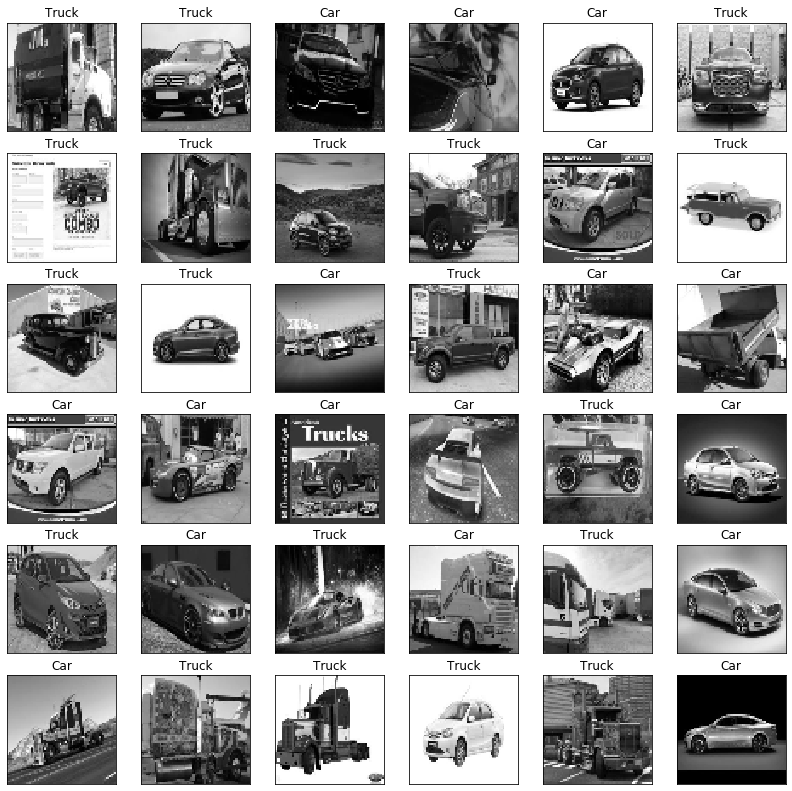

In [622]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[0:36]):
    y = fig.add_subplot(6,6,cnt+1)
    img = data[0]
    data = img.reshape(1,64,64,1)
    model_out = model.predict([data])
    if np.argmax(model_out) == 1:
        str_label = 'Truck'
    else:
        str_label = 'Car'
    y.imshow(img, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)